In [2]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [3]:
airbnb<-read.csv('data//airbnb.csv',sep = ',')

Mostrar las primeras 6 filas del dataframe

In [4]:
head(airbnb)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [5]:
##Renombramos las columnas
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
names(airbnb)<-newnames
#Mostramos el DF con las columnas renombradas
tail(airbnb)


,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
13202,28004,Universidad,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Heating,Family/kid friendly,Washer,Fire extinguisher,Essentials,Lock on bedroom door,Hangers,Hair dryer,Iron",NA,48,83
13203,28015,Universidad,Apartment,Entire home/apt,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Dryer,Smoke detector,Fire extinguisher,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,35,90
13204,28004,Universidad,Apartment,Entire home/apt,3,1,1,2,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,79,97
13205,28013,Universidad,Apartment,Entire home/apt,4,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Pool,Kitchen,Doorman,Gym,Elevator in building,Buzzer/wireless intercom,Heating,Washer,First aid kit,Safety card,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,150,100
13206,28004,Universidad,Loft,Entire home/apt,2,1,0,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,First aid kit,Essentials,Shampoo",NA,80,91
13207,28004,Universidad,Apartment,Entire home/apt,3,1,0,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Heating,Family/kid friendly,Washer",NA,69,80


Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [6]:
##Creamos nueva columna con la superficie en metros cuadrados
airbnb$MetrosCuadrados<-as.numeric(airbnb$PiesCuadrados*0.092903)
head(airbnb)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA


Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [7]:
airbnb$CodigoPostal[airbnb$CodigoPostal=='-']<-NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='28']<-NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='"']<-NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='28002\n28002']<-'28002'
airbnb$CodigoPostal[airbnb$CodigoPostal=='28051\n28051']<-'28051'
airbnb$CodigoPostal[airbnb$CodigoPostal=='Madrid 28004']<-'28004'
airbnb$CodigoPostal[airbnb$CodigoPostal=='2804']<-'28004'
airbnb$CodigoPostal[airbnb$CodigoPostal=='2805']<-'28005'
airbnb$CodigoPostal[airbnb$CodigoPostal=='2815']<-'28015'
airbnb$CodigoPostal[airbnb$CodigoPostal=='280013']<-'28013'
airbnb$CodigoPostal[grepl("^28", airbnb$CodigoPostal)=='FALSE']<-NA

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [8]:
##Metemos los CP en un DF para poder ver mejor los codigos postales que tenemos y las veces que se repiten
df_CP<-as.data.frame(table(airbnb$CodigoPostal))
names(df_CP)<-c("CodigoPostal","Count")
df_CP<-df_CP[df_CP$Count>0,]
df_CP<-df_CP[order(df_CP$Count, decreasing = TRUE),]
df_CP
df_CP$CodigoPostal

,CodigoPostal,Count
,<fct>,<int>
23,28012,2060
15,28004,1796
16,28005,1195
24,28013,1020
25,28014,630
26,28015,601
57,28045,495
21,28010,384
19,28008,338


[1] 28012 28004 28005 28013 28014 28015 28045 28010 28008 28028 28011 28001
[13] 28006 28009 28007 28019 28020 28003 28002 28039 28025 28027 28029 28017
[25] 28043 28026 28042 28033 28053 28038 28016 28030 28036 28047 28037 28041
[37] 28035 28021 28050 28034 28024 28018 28032 28046 28022 28031 28023 28044
[49] 28051 28040 28054 28055 28049 28048 28052 28056 28058 28060 28094 28105
[61] 28850
77 Levels:  - 20013 20126 2015 25008 27004 27013 28 28001 280013 ... Madrid 28004

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [12]:
paste("Los 5 codigos postales con mas entradas son:")
df_CP[1:5,]
paste("Los 5 codigos postales con menos entradas son:")
var1<-dim(df_CP)[1]
var2<-dim(df_CP)[1]-4
df_CP[var1:var2,]

[1] "Los 5 codigos postales con mas entradas son:"

,CodigoPostal,Count
,<fct>,<int>
23,28012,2060
15,28004,1796
16,28005,1195
24,28013,1020
25,28014,630


[1] "Los 5 codigos postales con menos entradas son:"

,CodigoPostal,Count
,<fct>,<int>
76,28850,1
74,28105,1
73,28094,1
72,28060,1
71,28058,1


**Comentario del alumno:**

Arriba coloco los 5 con menos entradas, pero porque estan ordenados de esa manera. Realmente CP con una entrada hay 8.

Asi aprovecho y muestro los datos utilizando los comandos de la libreria **dplyr**

In [14]:
library(dplyr)

count1<-filter(df_CP, df_CP$Count==1)
count1

CodigoPostal,Count
<fct>,<int>
28048,1
28052,1
28056,1
28058,1
28060,1
28094,1
28105,1
28850,1


¿Cuales son los barrios que hay en el código postal 28012?

In [27]:
df_BR<-as.data.frame(table(airbnb[airbnb$CodigoPostal=="28012","Barrio"]))
names(df_BR)<-c("Barrio","Entradas")
df_BR<-df_BR[df_BR$Entradas>0,]
paste("Listado de barrios que aparecen en el código postal 28012: ")
df_BR$Barrio


[1] "Listado de barrios que aparecen en el código postal 28012: "

[1] Acacias         Arapiles        Atocha          Cortes         
 [5] Delicias        Embajadores     Goya            Palacio        
 [9] Palos de Moguer Sol             Universidad    
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... Zofío

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postao 28012? Asumiendo que el identificador de Barrio sea correcto, ¿es fiable la columna de código postal?

In [29]:
df_BR<-df_BR[order(df_BR$Entradas, decreasing = TRUE),]
paste("Los barrios y entradas que hay para el código postal 28012, son:")
df_BR


[1] "Los barrios y entradas que hay para el código postal 28012, son:"

,Barrio,Entradas
,<fct>,<int>
49,Embajadores,1449
112,Sol,301
41,Cortes,216
85,Palos de Moguer,46
81,Palacio,27
2,Acacias,13
115,Universidad,4
14,Arapiles,1
18,Atocha,1


**Comentario del alumno:**

Vemos que para el CP 28012, nos aparece distintos barrios. Se podría decir que el barrio correcto es embajadores, porque tiene una mayor cantidad de datos (y tambien porque lo he buscado en Google), pero llegamos a la conclusión de que no podemos fiarnos del CP.

Para asergurame, he buscado los diferentes CP que aparecen en el Barrio "Palacio", y vemos que entre otros tantos CP, aparece el 28012.

In [30]:
sort(table(airbnb[airbnb$Barrio=="Palacio","CodigoPostal"]))


                        -        20013        20126         2015        25008 
           0            0            0            0            0            0 
       27004        27013           28        28001       280013        28002 
           0            0            0            0            0            0 
28002\n28002        28003        28006        28007        28009        28010 
           0            0            0            0            0            0 
       28014        28016        28017        28019        28020        28021 
           0            0            0            0            0            0 
       28022        28023        28024        28025        28026        28027 
           0            0            0            0            0            0 
       28028        28029        28030        28031        28032        28033 
           0            0            0            0            0            0 
       28034        28035        28036        28037

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [31]:
df_barrio<-as.data.frame(table(airbnb$Barrio))
names(df_barrio)<-c("Barrio","Count")
df_barrio<-df_barrio[df_barrio$Count>0,]
df_barrio<-df_barrio[order(df_barrio$Count, decreasing = TRUE),]
paste("El listado de barrios en todo el dataset de aribnb es:")
df_barrio$Barrio
paste("En el dataset de airbnb hay: ",dim(df_barrio)[1], "Barrios")

[1] "El listado de barrios en todo el dataset de aribnb es:"

[1] Embajadores                  Universidad                 
  [3] Palacio                      Sol                         
  [5] Justicia                     Cortes                      
  [7] Trafalgar                    Argüelles                   
  [9] Palos de Moguer              Goya                        
 [11] Puerta del Angel             Guindalera                  
 [13] Arapiles                     Recoletos                   
 [15] Almagro                      Acacias                     
 [17] Gaztambide                   Pacífico                    
 [19] Lista                        Delicias                    
 [21] Cuatro Caminos               Chopera                     
 [23] Ibiza                        Rios Rosas                  
 [25] Prosperidad                  Castellana                  
 [27] Jerónimos                    Imperial                    
 [29] San Isidro                   Castillejos                 
 [31] San Diego                    Bellas Vistas               
 [33] Ventas                       Casa de Campo               
 [35] Vista Alegre                 Hispanoamérica              
 [37] Fuente del Berro             Berruguete                  
 [39] Almenara                     Lucero                      
 [41] Nueva España                 Vallehermoso                
 [43] Comillas                     Numancia                    
 [45] Opañel                       Ciudad Jardín               
 [47] Valdefuentes                 Adelfas                     
 [49] Valdeacederas                Pinar del Rey               
 [51] Concepción                   Almendrales                 
 [53] Aluche                       El Viso                     
 [55] Quintana                     Simancas                    
 [57] Valverde                     Canillas                    
 [59] Pueblo Nuevo                 Casco Histórico de Vallecas 
 [61] Peñagrande                   Puerta Bonita               
 [63] Legazpi                      Ciudad Universitaria        
 [65] Moscardó                     Palomeras Bajas             
 [67] Costillares                  San Fermín                  
 [69] Cármenes                     Casco Histórico de Barajas  
 [71] Estrella                     Los Rosales                 
 [73] Castilla                     Niño Jesús                  
 [75] Pilar                        San Juan Bautista           
 [77] Alameda de Osuna             Fontarrón                   
 [79] Buenavista                   Campamento                  
 [81] San Andrés                   Casco Histórico de Vicálvaro
 [83] Rejas                        Valdezarza                  
 [85] Portazgo                     Abrantes                    
 [87] Arcos                        Atocha                      
 [89] Mirasierra                   San Pascual                 
 [91] Media Legua                  Vinateros                   
 [93] Aravaca                      Colina                      
 [95] La Paz                       Los Angeles                 
 [97] Timón                        Aguilas                     
 [99] Apostol Santiago             Palomeras Sureste           
[101] Pradolongo                   Entrevías                   
[103] Salvador                     Ambroz                      
[105] Marroquina                   Palomas                     
[107] Piovera                      Zofío                       
[109] Orcasur                      San Cristobal               
[111] Canillejas                   Aeropuerto                  
[113] Butarque                     Amposta                     
[115] Corralejos                   Hellín                      
[117] Pavones                      Rosas                       
[119] Santa Eugenia                Valdemarín                  
[121] Cuatro Vientos               El Goloso                   
[123] El Plantío                   Fuentelareina               
[125] Orcasitas                   

[1] "En el dataset de airbnb hay:  125 Barrios"

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [32]:
paste("Los 5 barrios con mayor numero de entradas son: ")
df_barrio[1:5,]

[1] "Los 5 barrios con mayor numero de entradas son: "

,Barrio,Count
,<fct>,<int>
49,Embajadores,1844
115,Universidad,1358
81,Palacio,1083
112,Sol,940
63,Justicia,785


¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [33]:
df_alqu<-as.data.frame(table(airbnb$TipoAlquiler))
names(df_alqu)<-c("TipoAlquiler","Count")
df_alqu<-df_alqu[df_alqu$Count>0,]
df_alqu<-df_alqu[order(df_alqu$Count, decreasing = TRUE),]
##Contamos los grupos
groups<-unique(df_alqu)
paste("Hay",length(df_alqu$TipoAlquiler),"tipos de Alquiler")

df_alqu

[1] "Hay 3 tipos de Alquiler"

,TipoAlquiler,Count
,<fct>,<int>
1,Entire home/apt,7903
2,Private room,5113
3,Shared room,191


Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


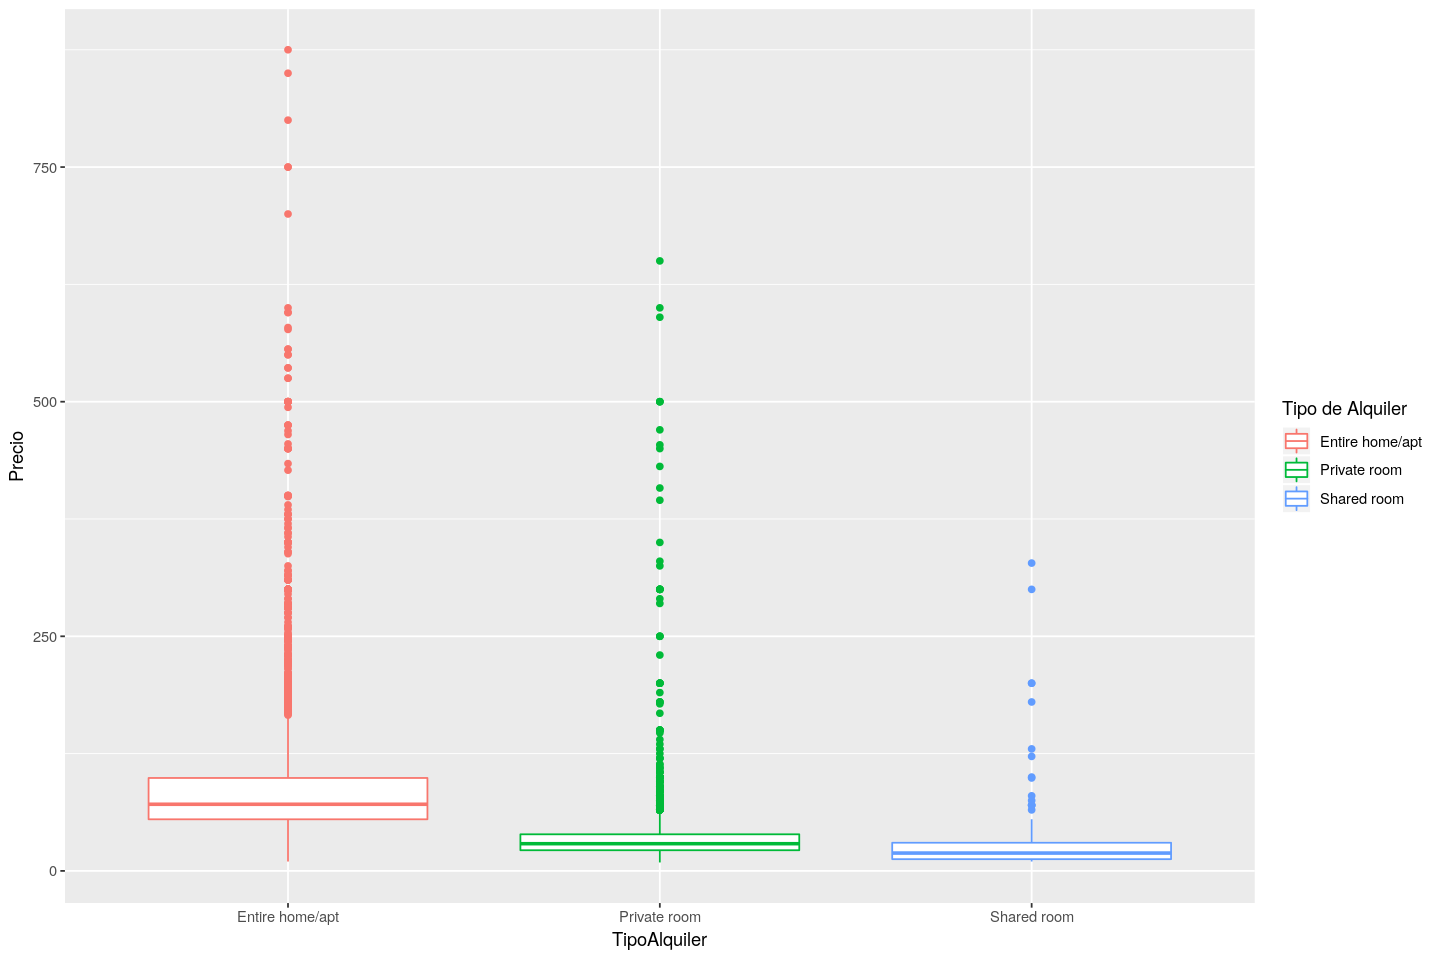

In [34]:
options(repr.plot.height=8,repr.plot.width=12)
ggplot(data=airbnb,aes(x=TipoAlquiler, y=Precio,color=TipoAlquiler))+geom_boxplot()+
 scale_color_discrete(name="Tipo de Alquiler")

Cual es el precio medio de alquiler medio de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [35]:
airbnb_private<-airbnb[airbnb$TipoAlquiler=="Private room",]
airbnb_entire<-airbnb[airbnb$TipoAlquiler=="Entire home/apt",]
airbnb_shared<-airbnb[airbnb$TipoAlquiler=="Shared room",]


paste("El alquiler medio para el piso completo es:",round(sum(airbnb_entire$Precio,na.rm=T)/dim(airbnb_entire)[1],2),"€")
paste("El alquiler medio para la habitación privada es:",round(sum(airbnb_private$Precio,na.rm=T)/dim(airbnb_private)[1],2),"€")
paste("El alquiler medio para la habitación compartida es:",round(sum(airbnb_shared$Precio,na.rm=T)/dim(airbnb_shared)[1],2),"€")


[1] "El alquiler medio para el piso completo es: 87.22 €"

[1] "El alquiler medio para la habitación privada es: 34.24 €"

[1] "El alquiler medio para la habitación compartida es: 29.85 €"

**Comentario del alumno:**

Primero debemos realizar un test de saphiro para cada uno de los grupos que queremos probar, para comprobar que estos siguen una distribución normal.

In [88]:
set.seed(123)
muestra<-airbnb[sample (1:nrow(airbnb),5000),]

paste("Las muestras de precio para el tipo de alquiler entero parecen no seguir una gaussiana. pvalor:",
         shapiro.test(muestra$Precio[muestra$TipoAlquiler=="Entire home/apt"])$p.value)
paste("Las muestras de precio para el tipo de alquiler de habitacion privada parecen no seguir una gaussiana. pvalor:",
          shapiro.test(muestra$Precio[muestra$TipoAlquiler=="Private room"])$p.value)
paste("Las muestras de precio para el tipo de alquiler de habitacion compartida parecen no seguir una gaussiana. pvalor:",
          shapiro.test(muestra$Precio[muestra$TipoAlquiler=="Shared room"])$p.value)

[1] "Las muestras de precio para el tipo de alquiler entero parecen no seguir una gaussiana. pvalor: 5.3365701656279e-63"

[1] "Las muestras de precio para el tipo de alquiler de habitacion privada parecen no seguir una gaussiana. pvalor: 6.7633406959697e-63"

[1] "Las muestras de precio para el tipo de alquiler de habitacion compartida parecen no seguir una gaussiana. pvalor: 2.40613437631062e-11"

**Comentario del alumno:**

Como podemos comprobar que las muestras anteriores no siguen una distribución Gaussiana. Por lo tanto, tal y como nos dice la teoría, el test a utilizar sería el de Kruskal-Wallis.

In [38]:
kruskal.test( Precio ~ TipoAlquiler, data=airbnb)


	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


**Comentario del alumno:**

El p-valor es realmente bajo, por lo que podemos rechazar la hipótesis nula. Esto significa que no todos los grupos tienen la misma media. Por lo tanto, la diferencia si es estadisticamente significativa.

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [40]:
airbnb_entire<-airbnb[airbnb$TipoAlquiler=="Entire home/apt",]

##Cambiamos desde ya el DF, poniendo todos las superficies a 0 como NA
airbnb_entire$MetrosCuadrados[airbnb_entire$MetrosCuadrados==0]<-NA

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire

In [41]:
df_barrio_ent<-as.data.frame(table(airbnb_entire$Barrio))
names(df_barrio_ent)<-c("Barrio","Count")
df_barrio_ent<-df_barrio_ent[df_barrio_ent$Count>0,]
df_barrio_ent<-df_barrio_ent[order(df_barrio_ent$Count, decreasing = TRUE),]
df_barrio_ent[1:5,]
paste("Hay: ",dim(df_barrio_ent)[1], "Barrios, que tienen apartamentos enteros en alquiler")

,Barrio,Count
,<fct>,<int>
49,Embajadores,1228
115,Universidad,984
81,Palacio,769
112,Sol,701
41,Cortes,574


[1] "Hay:  119 Barrios, que tienen apartamentos enteros en alquiler"

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [43]:
Precio_barrio<-aggregate(Precio~Barrio,airbnb_entire,mean, na.rm=T)
Precio_barrio<-Precio_barrio[order(Precio_barrio$Precio, decreasing = TRUE),]


Precio_barrio[1:5,]

,Barrio,Precio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [45]:
count_barrio<-aggregate(Precio~Barrio,airbnb_entire,length)
names(count_barrio)<-c("Barrio","Entradas")
count_barrio<-count_barrio[order(count_barrio$Entradas, decreasing = TRUE),]

Total = merge(count_barrio,Precio_barrio,by="Barrio", all=T)
Total<-Total[order(Total$Precio, decreasing = TRUE),]
Total
length(Total$Barrio)

,Barrio,Entradas,Precio
,<fct>,<int>,<dbl>
77,Palomas,4,309.75000
50,Fuentelareina,2,180.00000
93,Recoletos,134,161.92537
43,El Plantío,1,150.00000
30,Castellana,72,141.38889
27,Casco Histórico de Barajas,8,141.25000
6,Alameda de Osuna,4,138.75000
35,Ciudad Universitaria,13,138.30769
58,Jerónimos,62,131.82258


[1] 119

Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [46]:
top5<-Total[Total$Entradas>100,]
paste("Los 5 barrios con mayor precio, superando las 100 entradas son: ")

mostrar<-top5[1:5,]
mostrar

[1] "Los 5 barrios con mayor precio, superando las 100 entradas son: "

,Barrio,Entradas,Precio
,<fct>,<int>,<dbl>
93,Recoletos,134,161.92537
52,Goya,142,111.33803
106,Sol,701,100.75036
108,Trafalgar,223,98.57848
59,Justicia,534,98.25468


Dibuja el diagrama de densidad de distribución de los diferentes precios

Warning message:
“Removed 15 rows containing non-finite values (stat_density).”
Warning message:
“Removed 7 rows containing non-finite values (stat_density).”


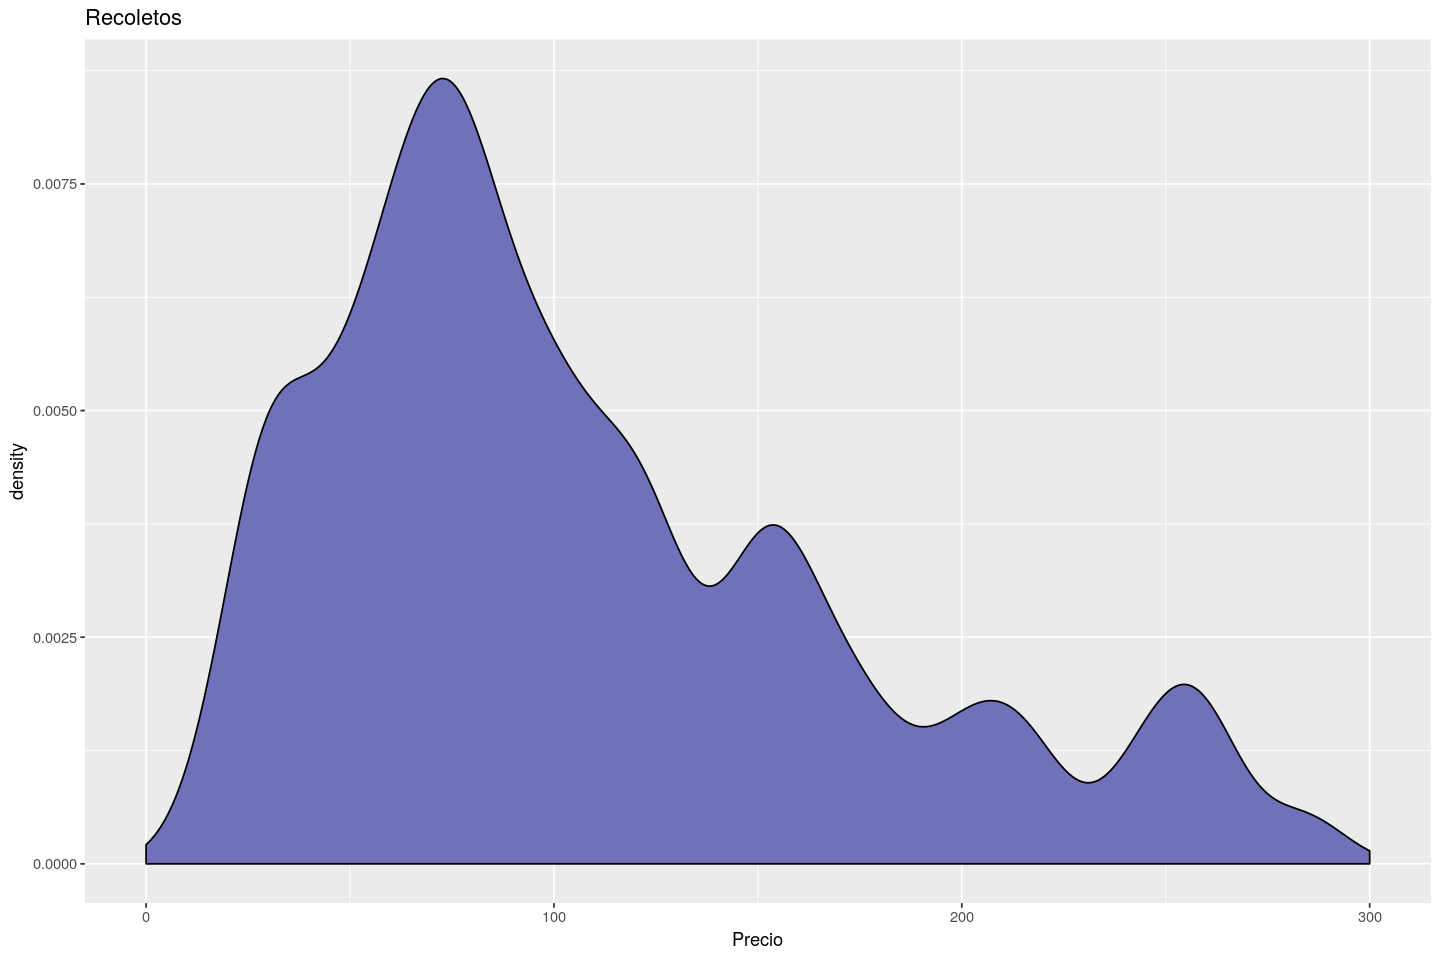

Warning message:
“Removed 4 rows containing non-finite values (stat_density).”


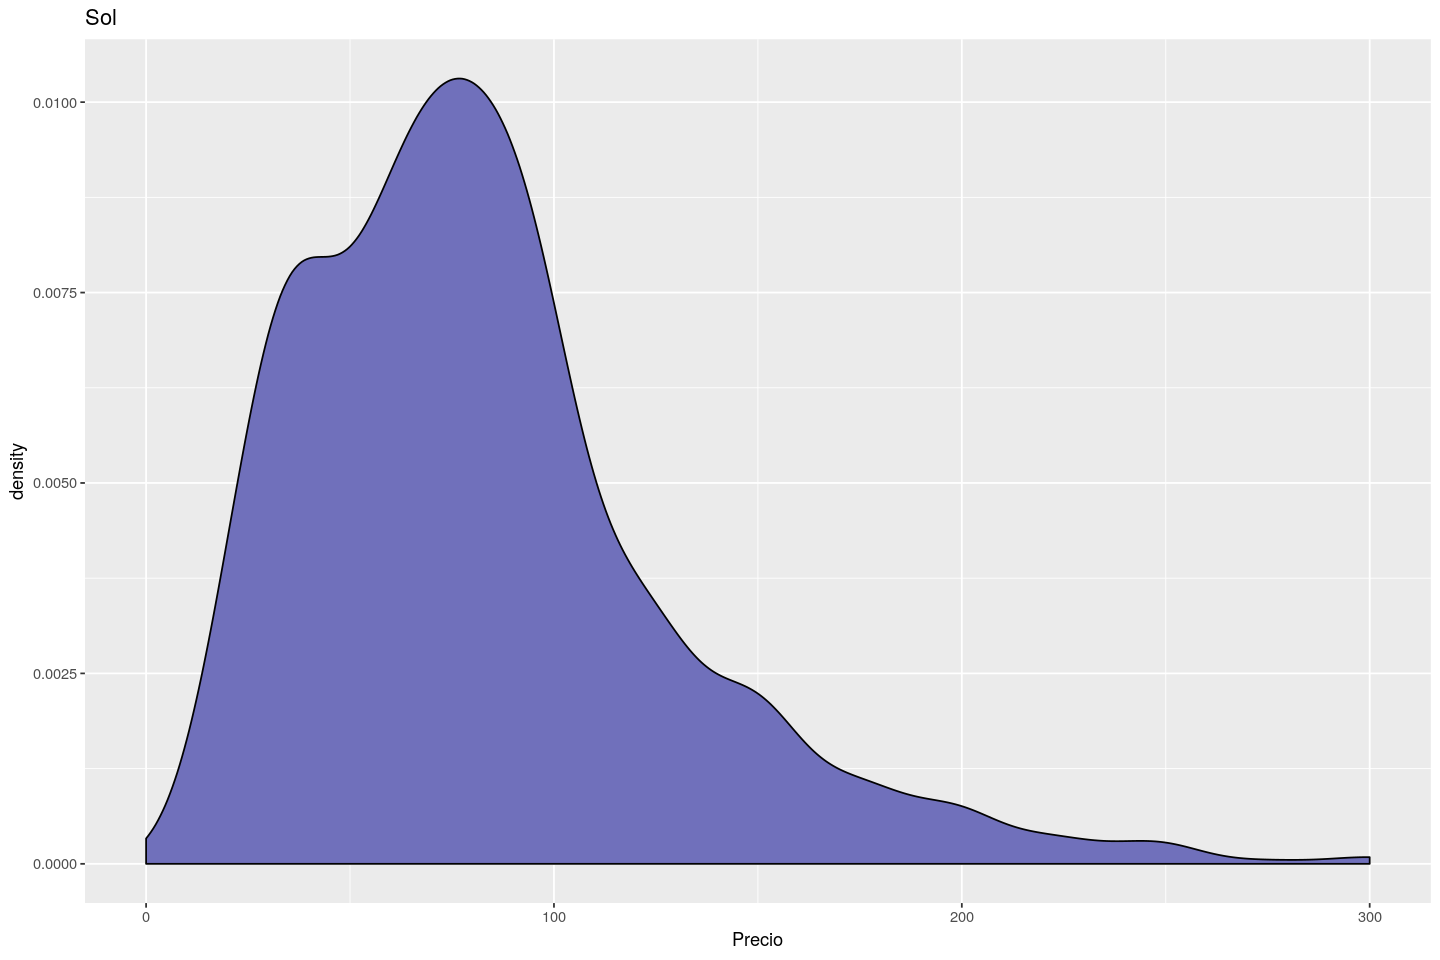

Warning message:
“Removed 5 rows containing non-finite values (stat_density).”


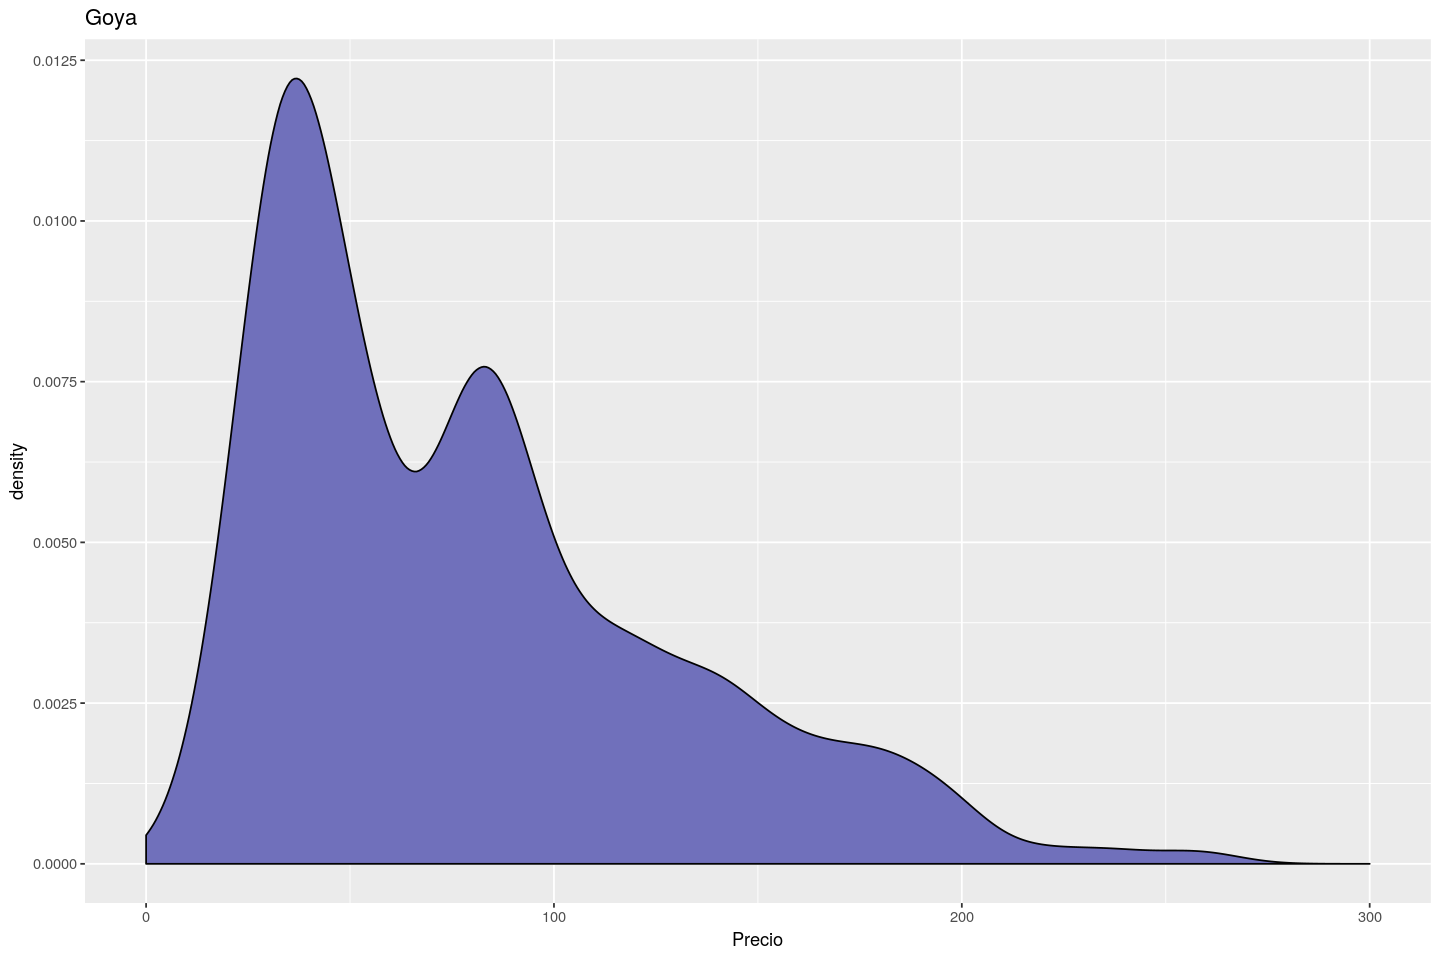

Warning message:
“Removed 4 rows containing non-finite values (stat_density).”


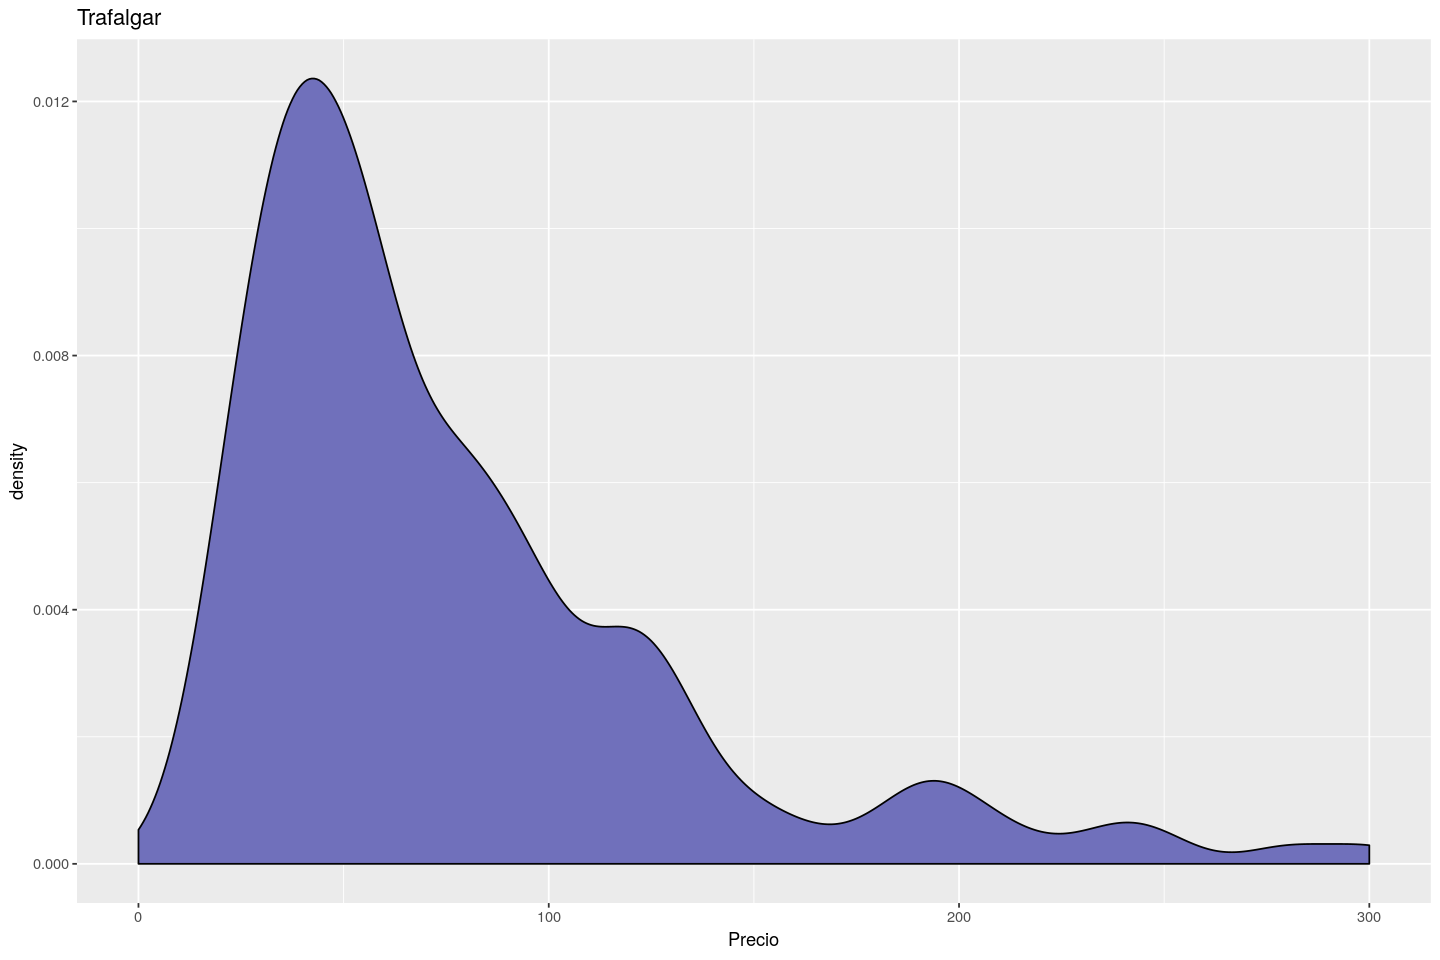

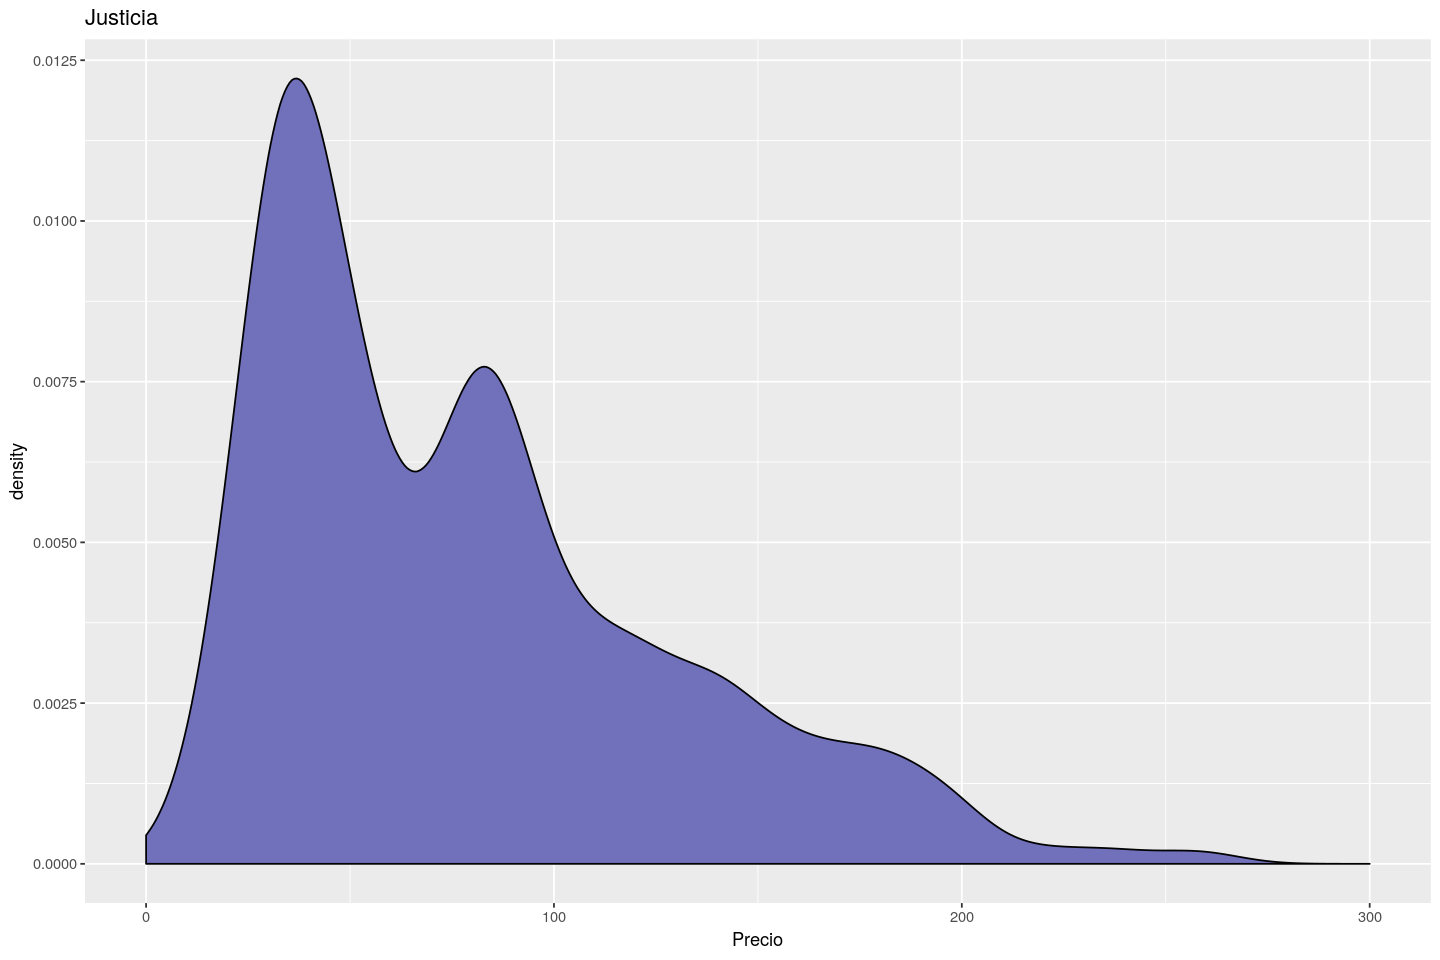

In [214]:
barrio_rec<-subset(airbnb,Barrio=="Recoletos")
ggplot(data=data.frame(x=barrio_rec$Precio), aes(x))+
  geom_density(fill="#7070BB",color="#010101", bw=10)+ 
  scale_x_continuous(breaks = seq(0,300,100), lim=c(0,300))+xlab("Precio")+ggtitle("Recoletos")

barrio_so<-subset(airbnb,Barrio=="Sol")
ggplot(data=data.frame(x=barrio_so$Precio), aes(x))+
  geom_density(fill="#7070BB",color="#010101", bw=10)+ 
  scale_x_continuous(breaks = seq(0,300,100), lim=c(0,300))+xlab("Precio")+ggtitle("Sol")

barrio_go<-subset(airbnb,Barrio=="Goya")
ggplot(data=data.frame(x=barrio_go$Precio), aes(x))+
  geom_density(fill="#7070BB",color="#010101", bw=10)+ 
  scale_x_continuous(breaks = seq(0,300,100), lim=c(0,300))+xlab("Precio")+ggtitle("Goya")

barrio_tr<-subset(airbnb,Barrio=="Trafalgar")
ggplot(data=data.frame(x=barrio_tr$Precio), aes(x))+
  geom_density(fill="#7070BB",color="#010101", bw=10)+ 
  scale_x_continuous(breaks = seq(0,300,100), lim=c(0,300))+xlab("Precio")+ggtitle("Trafalgar")

barrio_ju<-subset(airbnb,Barrio=="Justicia")
ggplot(data=data.frame(x=barrio_go$Precio), aes(x))+
  geom_density(fill="#7070BB",color="#010101", bw=10)+ 
  scale_x_continuous(breaks = seq(0,300,100), lim=c(0,300))+xlab("Precio")+ggtitle("Justicia")


Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [48]:
size_barrio<-aggregate(MetrosCuadrados~Barrio,airbnb_entire,mean,na.rm=T)
names(size_barrio)<-c("Barrio","Size")
size_barrio<-size_barrio[order(size_barrio$Size, decreasing = TRUE),]
#OJO! Solo me esta haciendo la media de los que si tienen m2

Total3 = merge(mostrar,size_barrio,by="Barrio", all=F)
Total3

Barrio,Entradas,Precio,Size
<fct>,<int>,<dbl>,<dbl>
Goya,142,111.33803,77.52755
Justicia,534,98.25468,53.88374
Recoletos,134,161.92537,26.66316
Sol,701,100.75036,68.42538
Trafalgar,223,98.57848,51.28246


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos

Warning message:
“Removed 169 rows containing non-finite values (stat_density).”
Warning message:
“Removed 877 rows containing non-finite values (stat_density).”


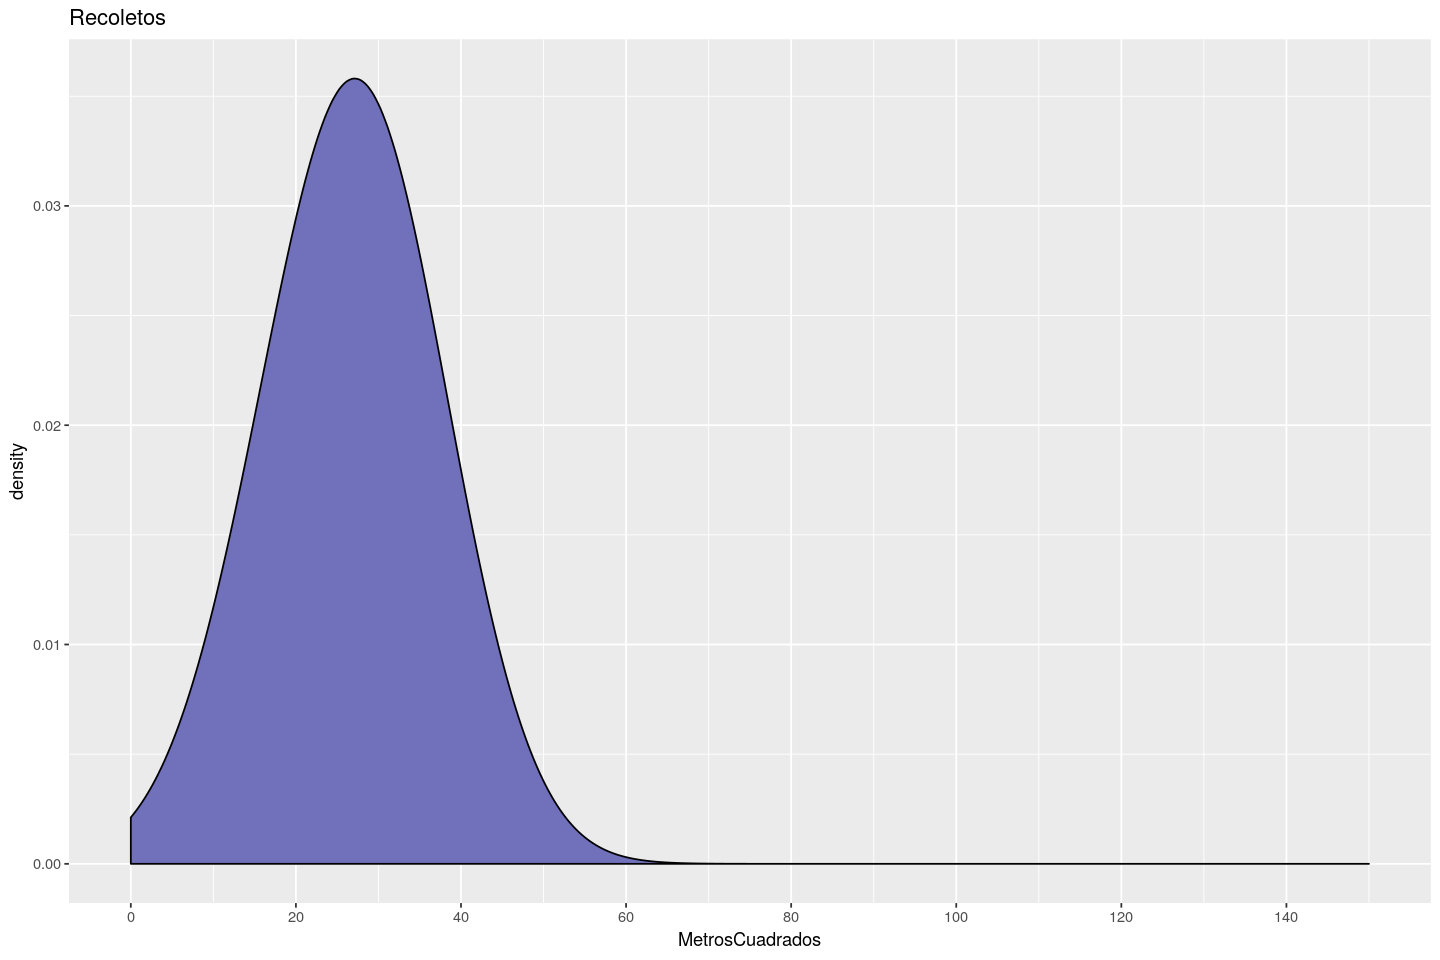

Warning message:
“Removed 224 rows containing non-finite values (stat_density).”


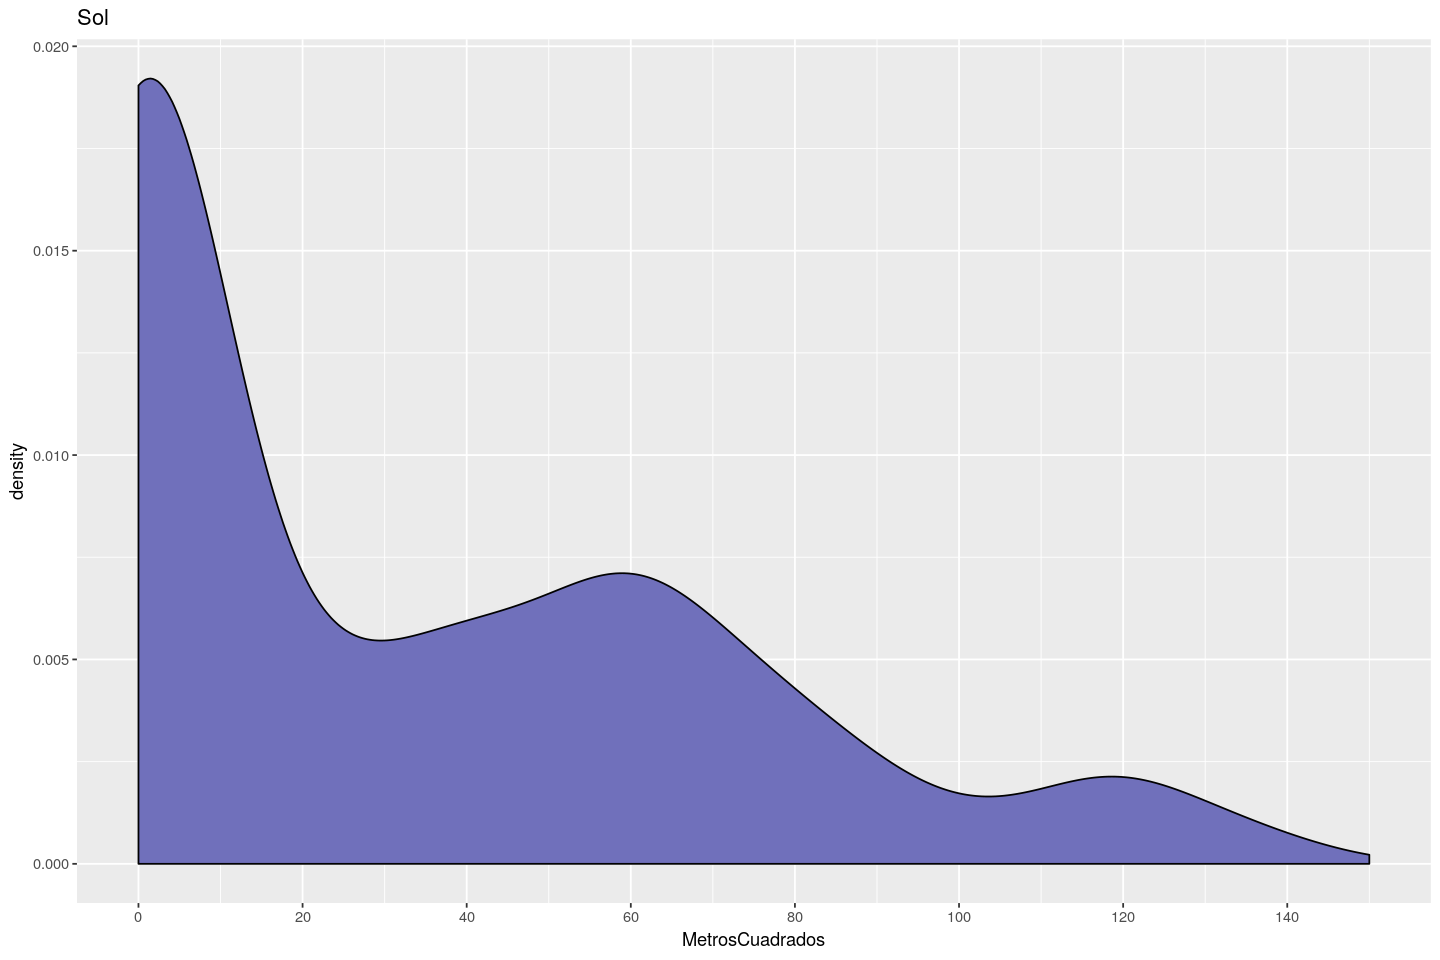

Warning message:
“Removed 306 rows containing non-finite values (stat_density).”


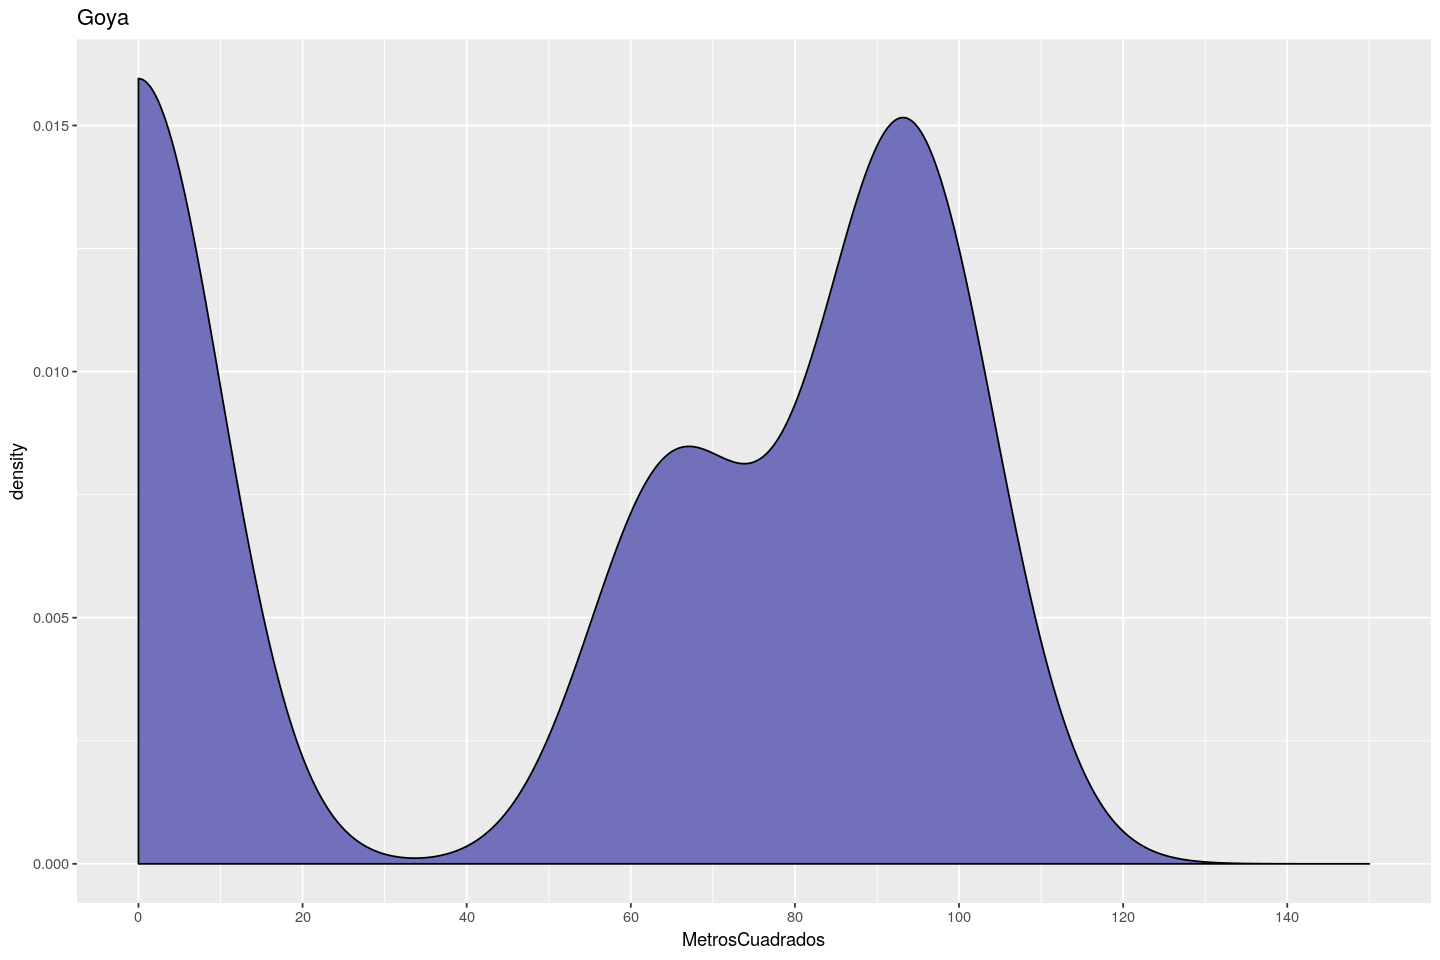

Warning message:
“Removed 224 rows containing non-finite values (stat_density).”


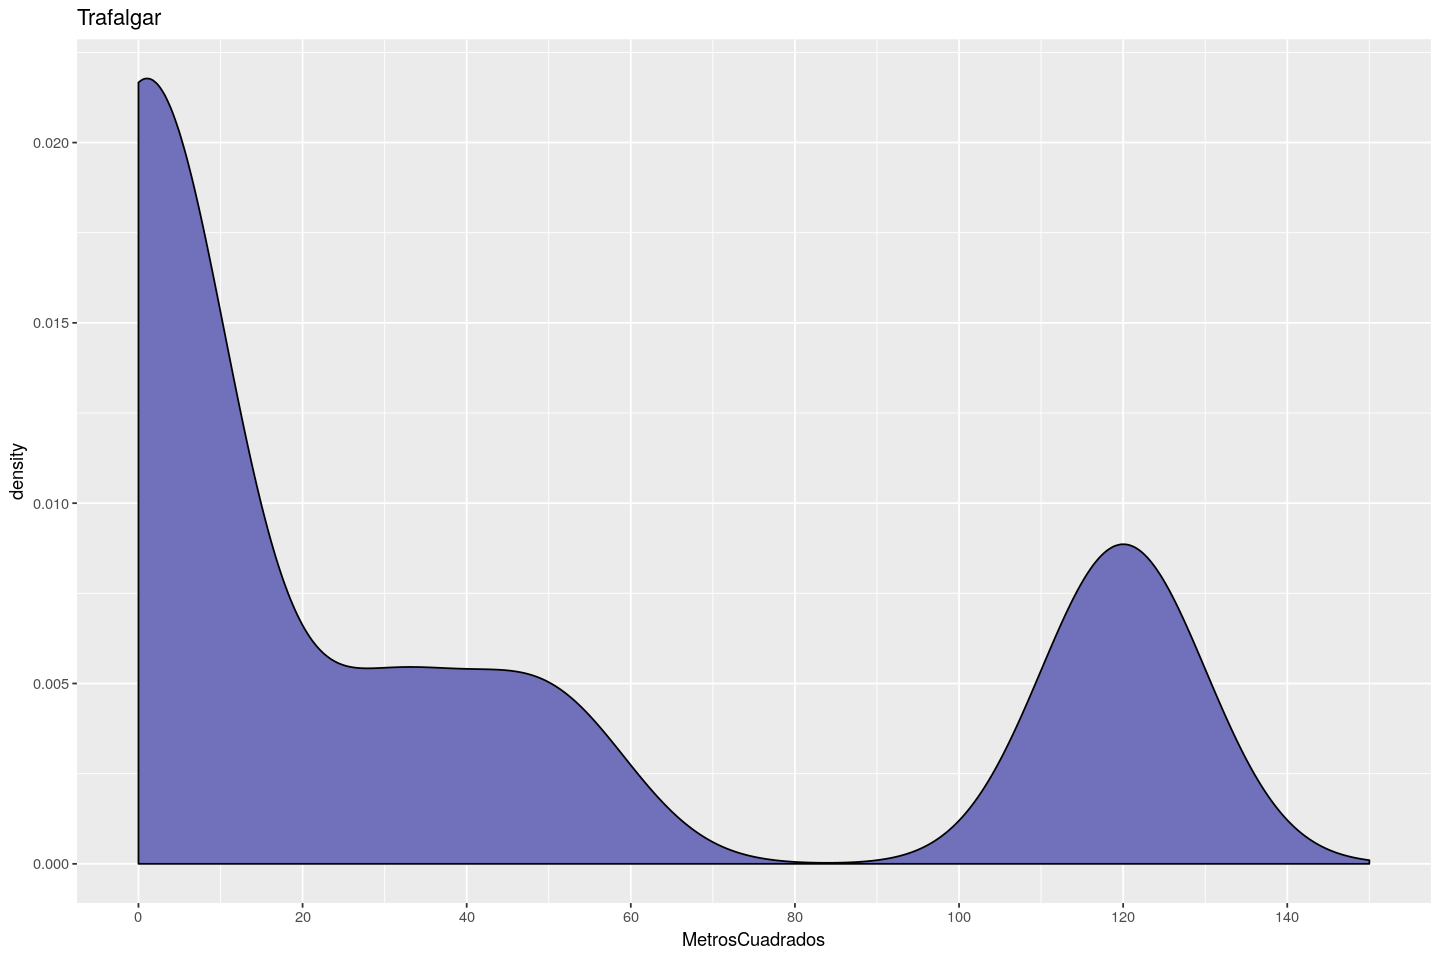

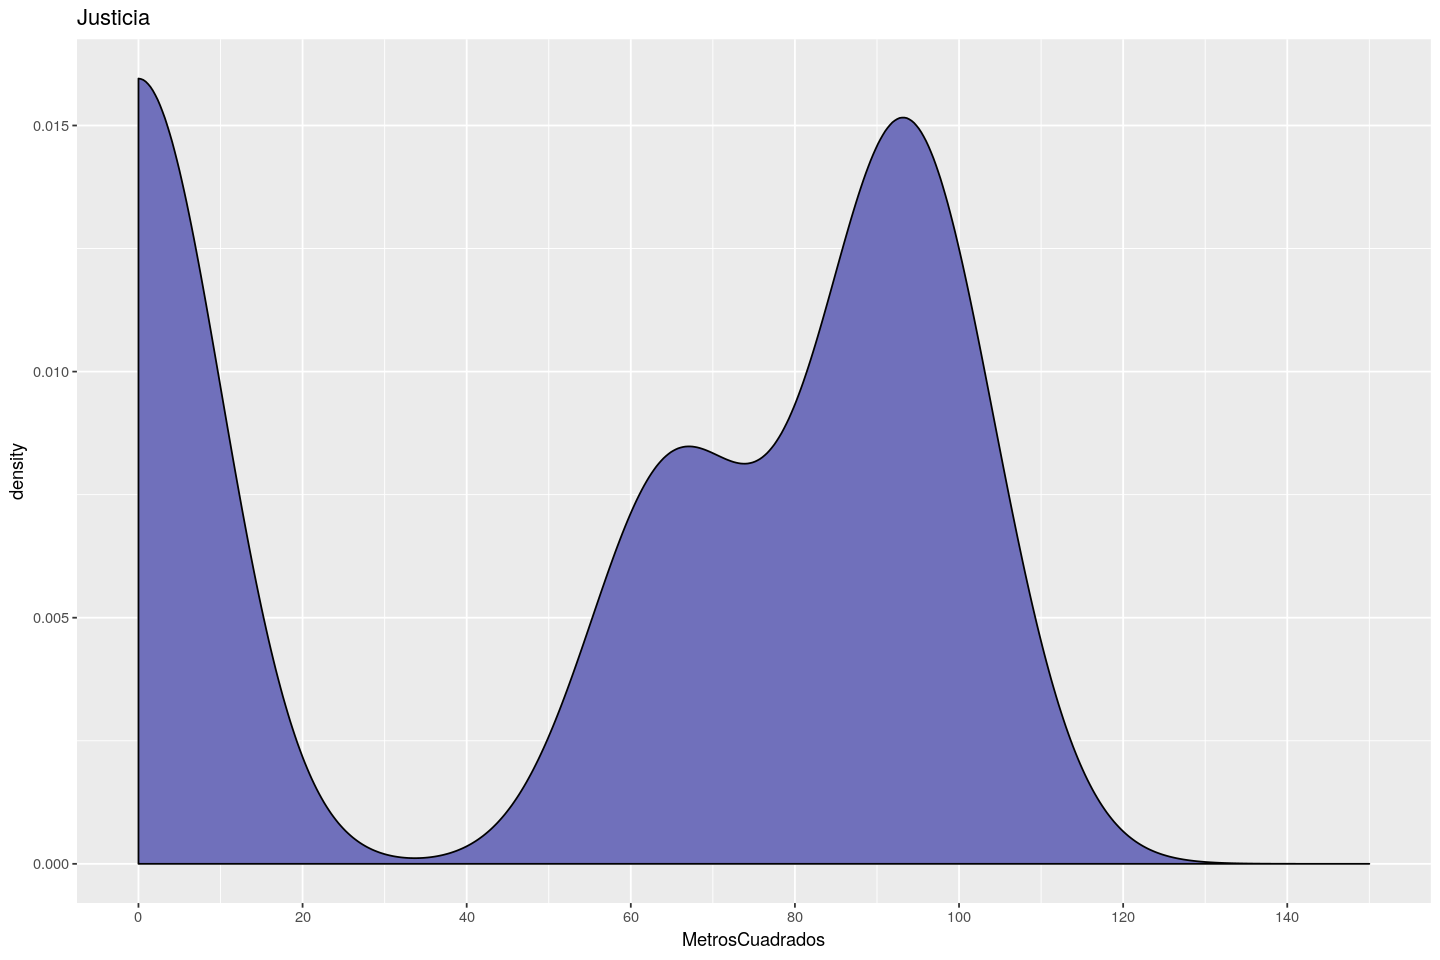

In [217]:
barrio_rec<-subset(airbnb,Barrio=="Recoletos")
ggplot(data=data.frame(x=barrio_rec$MetrosCuadrados), aes(x))+
  geom_density(fill="#7070BB",color="#010101", bw=10)+ 
  scale_x_continuous(breaks = seq(0,150,20), lim=c(0,150))+xlab("MetrosCuadrados")+ggtitle("Recoletos")

barrio_so<-subset(airbnb,Barrio=="Sol")
ggplot(data=data.frame(x=barrio_so$MetrosCuadrados), aes(x))+
  geom_density(fill="#7070BB",color="#010101", bw=10)+ 
  scale_x_continuous(breaks = seq(0,150,20), lim=c(0,150))+xlab("MetrosCuadrados")+ggtitle("Sol")

barrio_go<-subset(airbnb,Barrio=="Goya")
ggplot(data=data.frame(x=barrio_go$MetrosCuadrados), aes(x))+
  geom_density(fill="#7070BB",color="#010101", bw=10)+ 
  scale_x_continuous(breaks = seq(0,150,20), lim=c(0,150))+xlab("MetrosCuadrados")+ggtitle("Goya")

barrio_tr<-subset(airbnb,Barrio=="Trafalgar")
ggplot(data=data.frame(x=barrio_tr$MetrosCuadrados), aes(x))+
  geom_density(fill="#7070BB",color="#010101", bw=10)+ 
  scale_x_continuous(breaks = seq(0,150,20), lim=c(0,150))+xlab("MetrosCuadrados")+ggtitle("Trafalgar")

barrio_ju<-subset(airbnb,Barrio=="Justicia")
ggplot(data=data.frame(x=barrio_go$MetrosCuadrados), aes(x))+
  geom_density(fill="#7070BB",color="#010101", bw=10)+ 
  scale_x_continuous(breaks = seq(0,150,20), lim=c(0,150))+xlab("MetrosCuadrados")+ggtitle("Justicia")

**Comentario del alumno:**

Tras hablar con el profesor, me comenta que hay que hacer una grafica de distribucion para cada gráfico, tanto en el precio como en los metros cuadrados.

Yo inicialmente habia hecho una para el total de los datos:

Esta claro que las medias de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [154]:
set.seed(123)
soloprueba<-airbnb
soloprueba$MetrosCuadrados[soloprueba$MetrosCuadrados==0]<-NA


paste("Las muestras de precio para el barrio Goya parecen no seguir una gaussiana. pvalor:",
         shapiro.test(airbnb$MetrosCuadrados[airbnb$Barrio=="Goya"])$p.value)
paste("Las muestras de precio para el barrio Justicia parecen no seguir una gaussiana. pvalor:",
         shapiro.test(airbnb$MetrosCuadrados[airbnb$Barrio=="Justicia"])$p.value)
paste("Las muestras de precio para el barrio Recoletos parecen no seguir una gaussiana. pvalor:",
         shapiro.test(airbnb$MetrosCuadrados[airbnb$Barrio=="Recoletos"])$p.value)
paste("Las muestras de precio para el barrio Sol parecen no seguir una gaussiana. pvalor:",
         shapiro.test(airbnb$MetrosCuadrados[airbnb$Barrio=="Sol"])$p.value)
paste("Las muestras de precio para el barrio parecen no seguir una gaussiana. pvalor:",
         shapiro.test(airbnb$MetrosCuadrados[airbnb$Barrio=="Trafalgar"])$p.value)

[1] "Las muestras de precio para el barrio Goya parecen no seguir una gaussiana. pvalor: 0.121494898453778"

[1] "Las muestras de precio para el barrio Justicia parecen no seguir una gaussiana. pvalor: 5.85496819399329e-05"

[1] "Las muestras de precio para el barrio Recoletos parecen no seguir una gaussiana. pvalor: 0"

[1] "Las muestras de precio para el barrio Sol parecen no seguir una gaussiana. pvalor: 4.9736512940207e-08"

[1] "Las muestras de precio para el barrio parecen no seguir una gaussiana. pvalor: 0.00965478604203037"

**Comentario del alumno:**

Como podemos comprobar que las muestras anteriores no siguen una distribución Gaussiana, a excepcion de Goya(porque el dataset de metros cuadrados para tipo alquiler entire fue modificado de 0 a NA, y la mayoria de entradas de Goya son para ese tipo). Pero podemos decir que todas lo son.
Por lo tanto, tal y como nos dice la teoría, el test a utilizar sería el de Kruskal-Wallis.

In [155]:
kruskal.test( MetrosCuadrados ~ Barrio, data=airbnb)


	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 93.358, df = 81, p-value = 0.1642


**Comentario del alumno:**

En este caso podemos decir que no la diferencia no es estadisticamente significativa, puesto que el p-valor no es inferior a 0.005.

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [156]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [158]:
#Creamos un DF cogiendo solamente esas variables
df_cor<-data.frame(Numbayos=barrio_sol$NumBanyos,NumDormitorios=barrio_sol$NumDormitorios, MaxOcupantes=barrio_sol$MaxOcupantes, MetrosCuadrados=barrio_sol$MetrosCuadrados, stringsAsFactors = F)
prueba<-cbind(barrio_sol$NumBanyos, barrio_sol$NumDormitorios, barrio_sol$MaxOcupantes, barrio_sol$MetrosCuadrados)

nnames=c("Numbayos", "NumDormitorios","MaxOcupantes","MetrosCuadrados")
colnames(prueba)<-nnames
#Creamos la matriz de correlación
cor(df_cor,use="complete.obs")
#cor(prueba,use="complete.obs")
#prueba2<-cor(cbind(barrio_sol$NumBanyos, barrio_sol$NumDormitorios, barrio_sol$MaxOcupantes, barrio_sol$MetrosCuadrados),use="complete.obs")
#prueba2
#cor(df_cor2,use="complete.obs")
#df_cor2

,Numbayos,NumDormitorios,MaxOcupantes,MetrosCuadrados
Numbayos,1.0000000,0.7356920,0.8528252,0.5712130
NumDormitorios,0.7356920,1.0000000,0.7841590,0.7717458
MaxOcupantes,0.8528252,0.7841590,1.0000000,0.7108265
MetrosCuadrados,0.5712130,0.7717458,0.7108265,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


**Comentario del alumno:**

En este caso la relación entre NumDormitorios y MetrosCuadrados nos da alta, un 0,77, porque yo al dataset airbnb_entire ya sustitui los valores de 0 por NA, y al hacer la correlacion no se tienen en cuenta dichos valores. Digamos que en el ejercicio anterior ya vi que habia que quitar los datos con 0.

Por esta razon no es necesario filtrar nada, ya que lo filtre anteriormente. En el caso de haber tenido los datos con 0, me huiese salido que esas variables tenian una menor ralacion y por tanto una menor correlacion.

Warning message:
“Removed 665 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


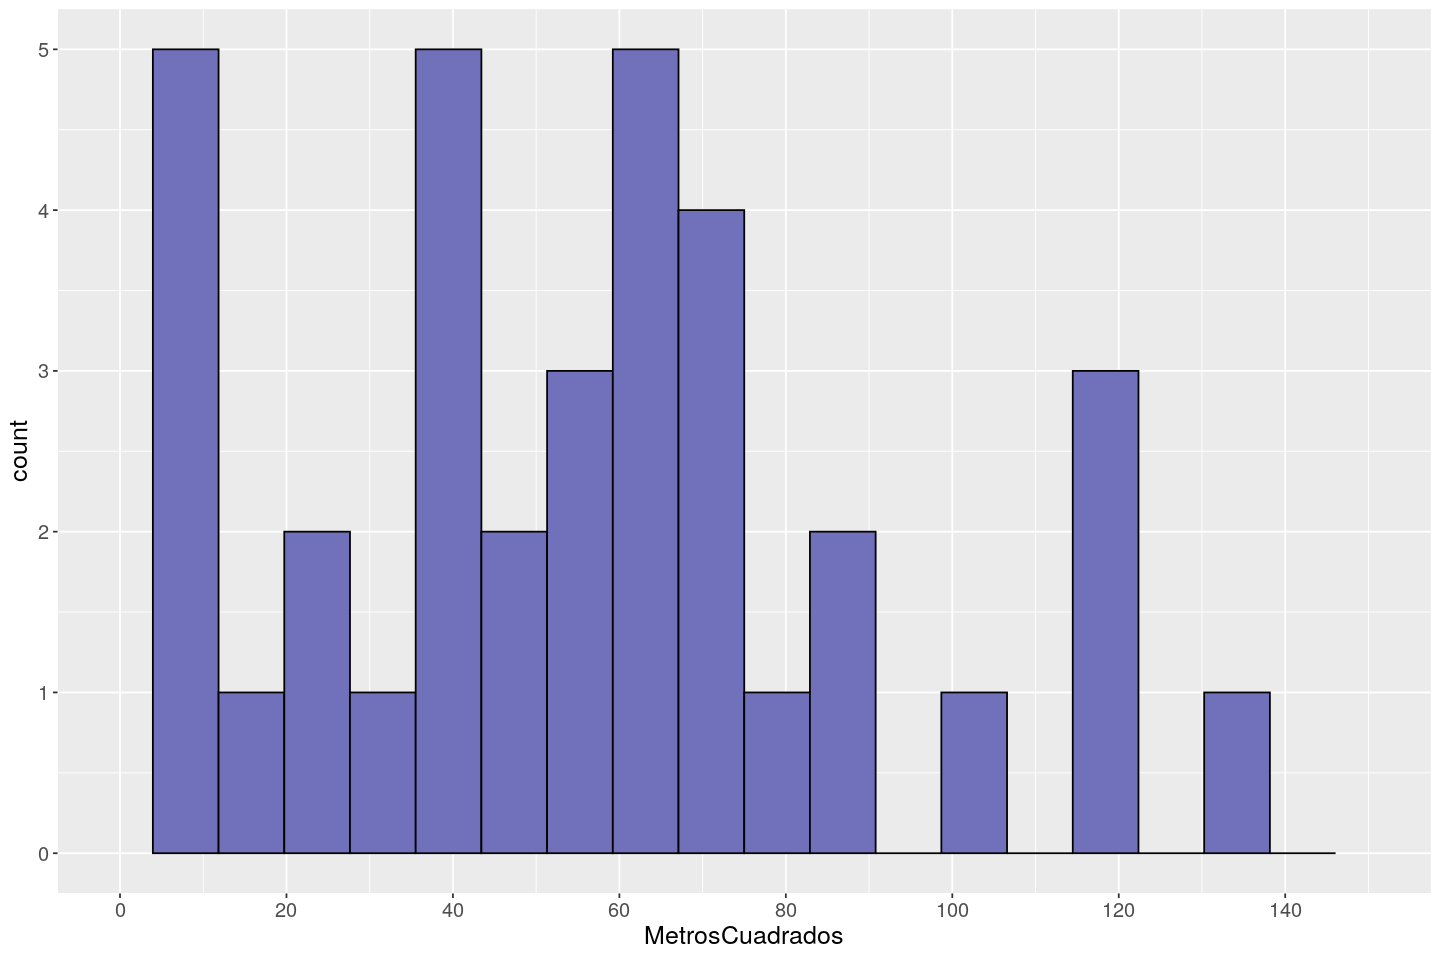

In [159]:
library(ggplot2)
ggplot(data=barrio_sol, aes(x=MetrosCuadrados))+
  geom_histogram(bins=20,fill="#7070BB",color="#010101")+ 
   theme(tex=element_text(size=15))+
  scale_x_continuous(breaks = seq(0,150,20), lim=c(0,150))#+
  #geom_jitter(aes(y=500),widht=0,height=500,alpha=0.5,size=0.1)

Warning message:
“Removed 663 rows containing non-finite values (stat_density).”


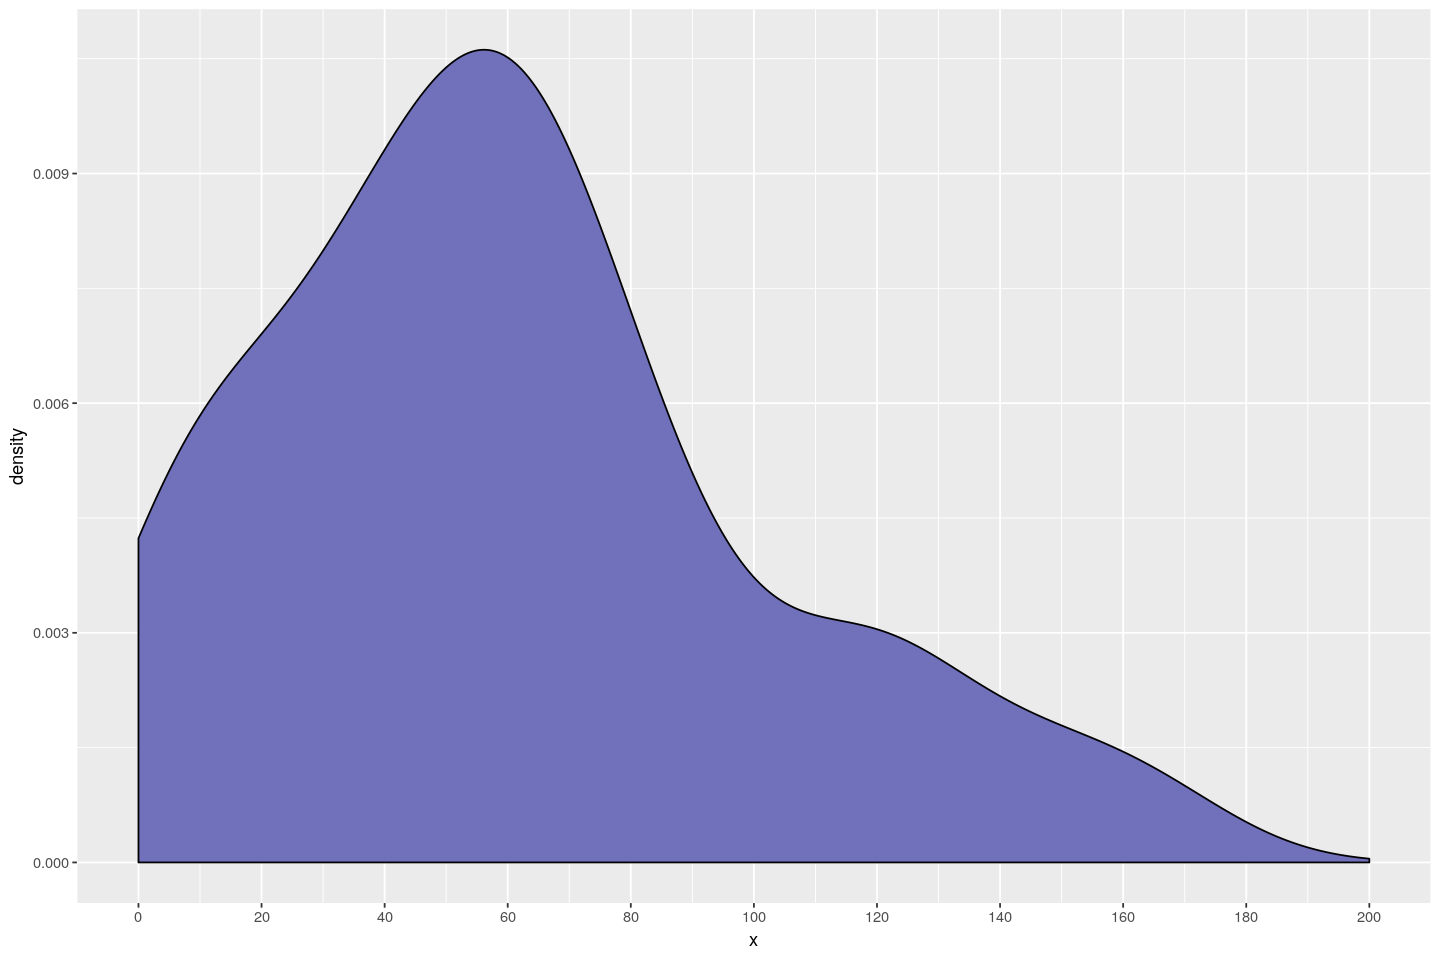

In [160]:
ggplot(data=data.frame(x=barrio_sol$MetrosCuadrados), aes(x))+
  geom_density(fill="#7070BB",color="#010101", bw=15)+ 
  scale_x_continuous(breaks = seq(0,200,20), lim=c(0,200))

**Comentario del alumno:**

Teniendo en cuenta que esta variable tiene muchos datos nulos, aqui solo se nos muestran los que tienen datos, pero aun asi hay muchisimos datos en el rano 0-10(que probablemente esten mal), por esta razon no sale la distribucion tan normalizada.

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [161]:
##Calculo de la regresion lineal multiple con todas las variables
model<-lm(data=barrio_sol, formula = Precio ~ NumBanyos+NumDormitorios+MaxOcupantes+MetrosCuadrados)
summary(model)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-78.612 -15.964  -2.284  15.983  69.387 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      32.5859    10.7807   3.023 0.004666 ** 
NumBanyos         0.7013    13.4708   0.052 0.958778    
NumDormitorios   29.8080     7.3856   4.036 0.000281 ***
MaxOcupantes      1.9376     3.9943   0.485 0.630634    
MetrosCuadrados   0.1880     0.1578   1.192 0.241398    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.48 on 35 degrees of freedom
  (661 observations deleted due to missingness)
Multiple R-squared:  0.7562,	Adjusted R-squared:  0.7284 
F-statistic: 27.14 on 4 and 35 DF,  p-value: 2.666e-10


**Comentario del alumno:**

pr mas bajo el numero de dormitorios, es el que mas influencia tiene ya que su pr es menor. 

Aunque no lo pedia el ejercicio, quería ver una regresión multiple con ambas variables, numDormitorios y MetrosCuadrados.

In [162]:
##Calculo de la regresion lineal multiple con las variables con pr mas bajo
model<-lm(data=barrio_sol, formula = Precio ~ NumDormitorios+MetrosCuadrados)
summary(model)


Call:
lm(formula = Precio ~ NumDormitorios + MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.134 -16.183  -0.823  15.801  68.085 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      36.8284     7.9805   4.615 4.61e-05 ***
NumDormitorios   32.5581     5.8817   5.535 2.67e-06 ***
MetrosCuadrados   0.2153     0.1449   1.486    0.146    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.88 on 37 degrees of freedom
  (661 observations deleted due to missingness)
Multiple R-squared:  0.7527,	Adjusted R-squared:  0.7393 
F-statistic: 56.31 on 2 and 37 DF,  p-value: 5.952e-12


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [163]:
model_dorm<-lm(barrio_sol, formula=Precio~NumDormitorios)
summary(model_dorm)
confint(model_dorm)


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol)

Residuals:
     Min       1Q   Median       3Q      Max 
-206.225  -22.676   -4.312   16.416  263.960 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      52.584      2.568   20.48   <2e-16 ***
NumDormitorios   33.364      1.459   22.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.9 on 699 degrees of freedom
Multiple R-squared:  0.4281,	Adjusted R-squared:  0.4272 
F-statistic: 523.1 on 1 and 699 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),47.54299,57.62561
NumDormitorios,30.50004,36.22803


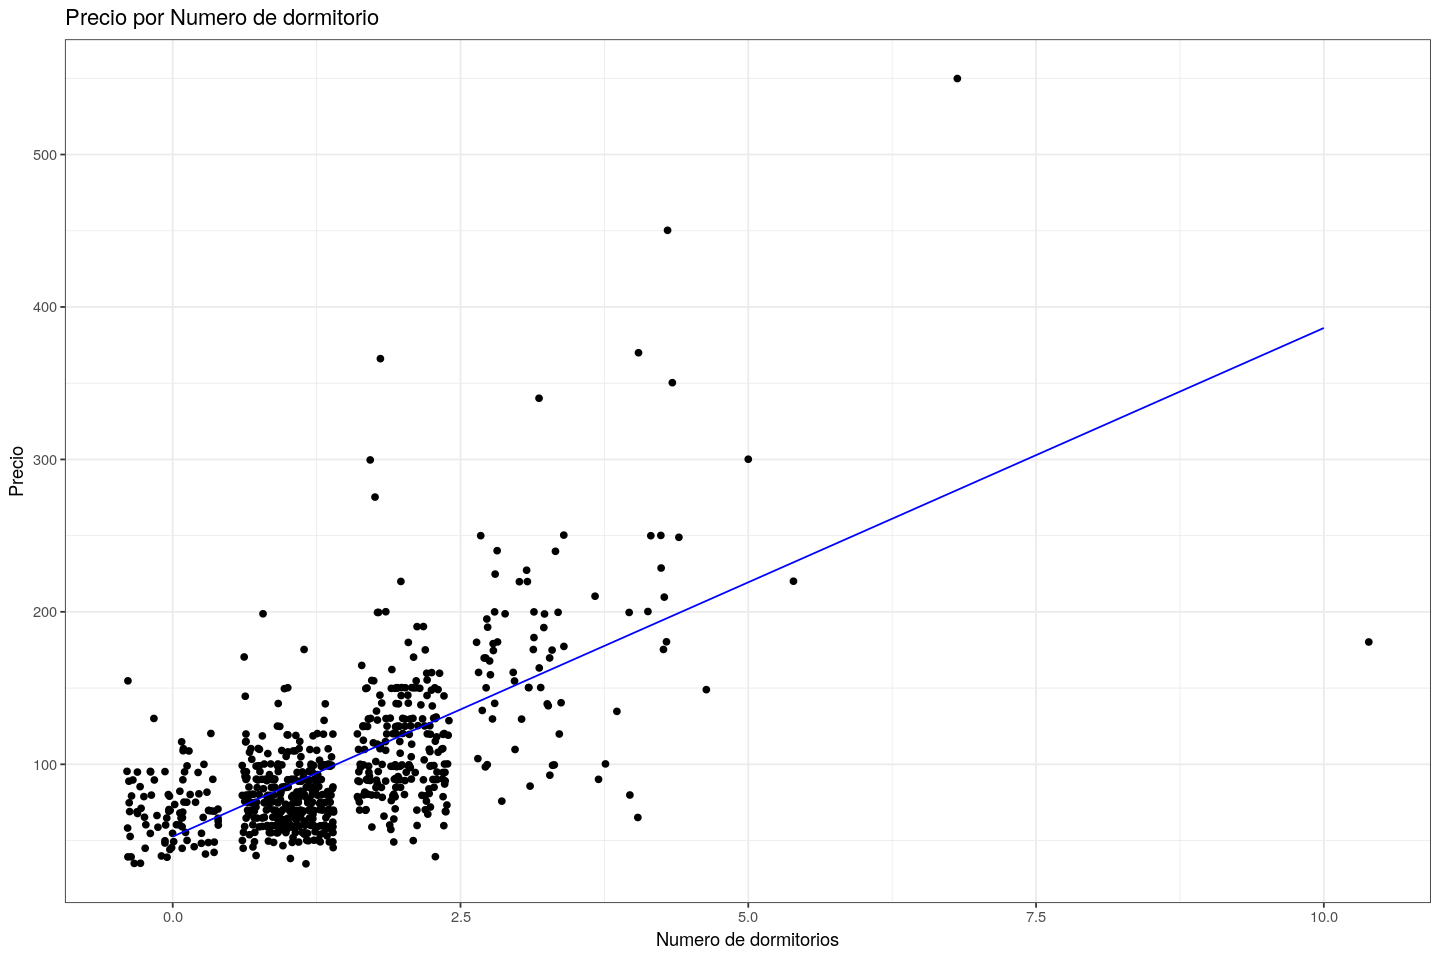

In [165]:
barrio_sol$predicted <- predict(model_dorm, barrio_sol)
ggplot(data=barrio_sol,aes(x=NumDormitorios))+
   geom_jitter(aes(y=Precio))+
   geom_line(aes(y=predicted),color="blue")+
   theme_bw()+xlab("Numero de dormitorios")+ylab("Precio")+ggtitle("Precio por Numero de dormitorio")

##Utilizo geom_jitter para que los puntos se distribuyan

In [166]:
##Crear el DF
model_mtr<-lm(barrio_sol, formula=Precio~MetrosCuadrados)
summary(model_mtr)
confint(model_mtr)


Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.175 -21.635  -6.466  20.533 128.270 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      46.5709    10.3852   4.484 6.55e-05 ***
MetrosCuadrados   0.8342     0.1229   6.786 4.80e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.53 on 38 degrees of freedom
  (661 observations deleted due to missingness)
Multiple R-squared:  0.5479,	Adjusted R-squared:  0.536 
F-statistic: 46.05 on 1 and 38 DF,  p-value: 4.795e-08


,2.5 %,97.5 %
(Intercept),25.5471054,67.594737
MetrosCuadrados,0.5853331,1.083027


Warning message:
“Removed 661 rows containing missing values (geom_point).”
Warning message:
“Removed 661 rows containing missing values (geom_path).”


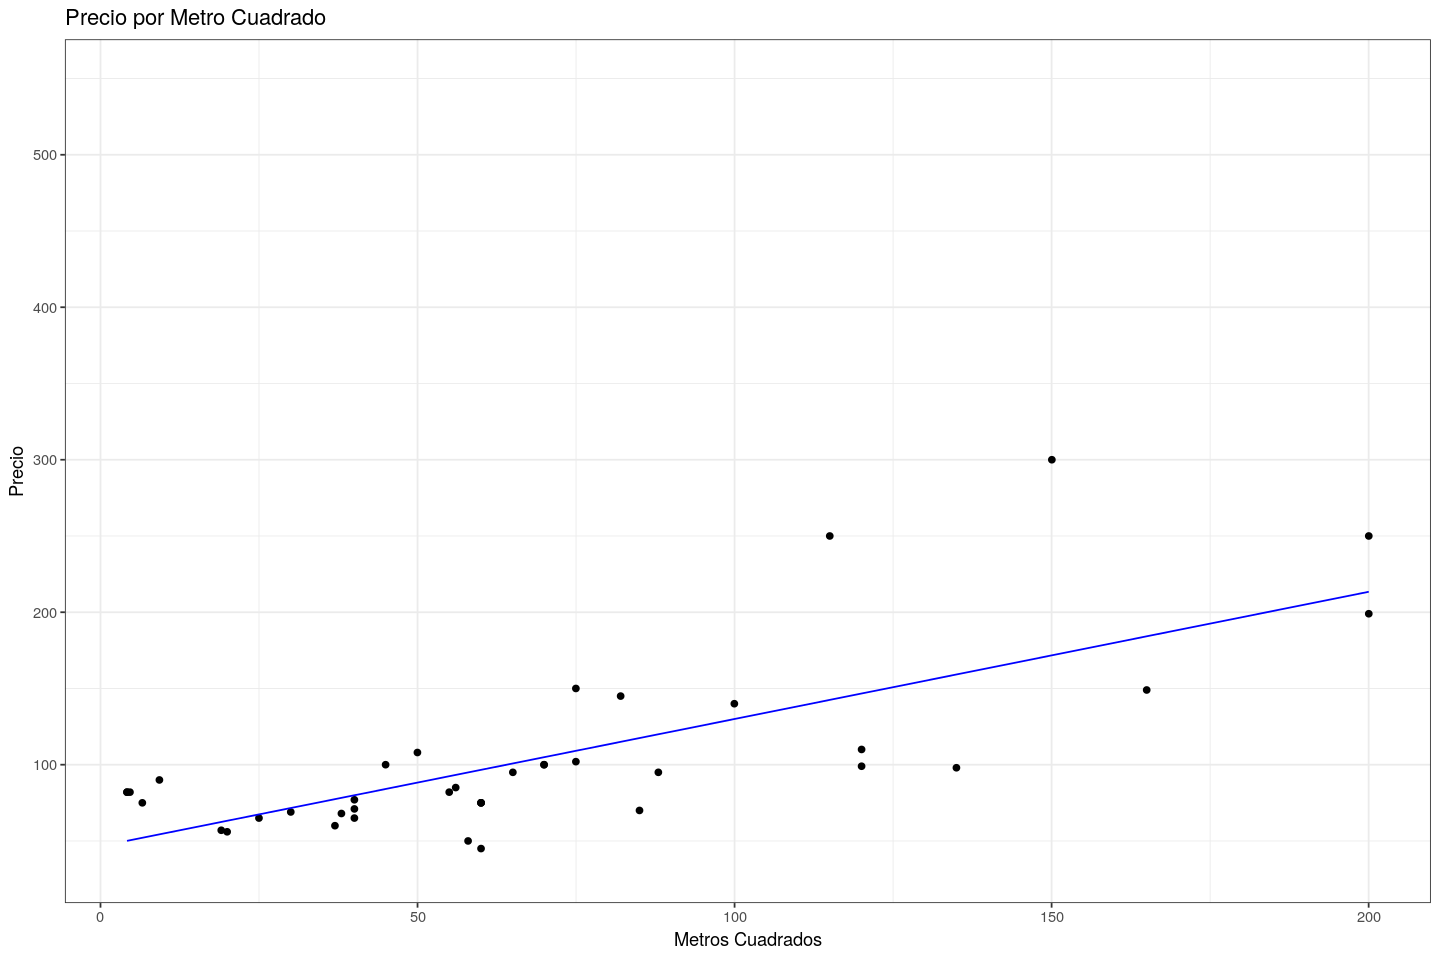

In [167]:
barrio_sol$predicted2 <- predict(model_mtr, barrio_sol)

ggplot(data=barrio_sol,aes(x=MetrosCuadrados))+
   geom_point(aes(y=Precio))+
   geom_line(aes(y=predicted2),color="blue")+
   theme_bw()+xlab("Metros Cuadrados")+ylab("Precio")+ggtitle("Precio por Metro Cuadrado")

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [185]:
paste("Se incrementa: ",confint(model_mtr)[4:4])
confint(model_mtr)

[1] "Se incrementa:  1.08302676002559"

,2.5 %,97.5 %
(Intercept),25.5471054,67.594737
MetrosCuadrados,0.5853331,1.083027


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [183]:
paste("Se incrementa: ",confint(model_dorm)[4:4])
confint(model_dorm)


[1] "Se incrementa:  36.2280331958965"

,2.5 %,97.5 %
(Intercept),47.54299,57.62561
NumDormitorios,30.50004,36.22803


¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el margen de error de esa probabilidad?

In [186]:
n<-length(barrio_sol$NumDormitorios)
ns<-length(barrio_sol$NumDormitorios[barrio_sol$NumDormitorios==3])
prob<-ns/n
paste("La probabilidad de encontrar en Sol un apartamento de 3 habitacioneses: ",round(prob*100,2),"%")
binom.test(ns,n)

[1] "La probabilidad de encontrar en Sol un apartamento de 3 habitacioneses:  7.85 %"


	Exact binomial test

data:  ns and n
number of successes = 55, number of trials = 701, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.0596506 0.1009033
sample estimates:
probability of success 
            0.07845934 


**Comentario del alumno:**

Como pueden ver el margen de error es 0.0596506 0.1009033.